In [ ]:
#Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
#Loading dataset
cifar = tf.keras.datasets.cifar10
(xtrain,ytrain),(xtest,ytest) = cifar.load_data()

In [ ]:
#Dependent variable is in 2D So forcefully converting into 1D by using flatten
ytrain = ytrain.flatten()
ytest = ytest.flatten()

In [ ]:
#Normalisation / Scaling the data
x_train , x_test = xtrain/255.0, xtest/255.0

In [ ]:
# Number of classes
K = len(set(ytrain))
print("Number of classes:",K)

Number of classes: 10


In [ ]:
#Build the model by using the Functionla API
i = Input(shape= xtrain[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [ ]:
#Build the compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Train the model
cif = model.fit(x_train,ytrain,validation_data=(x_test,ytest),epochs=100)

Epoch 1/100
1563/1563 [==============================] - 43s 8ms/step - loss: 1.5498 - accuracy: 0.4357 - val_loss: 1.2461 - val_accuracy: 0.5501
Epoch 2/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2618 - accuracy: 0.5472 - val_loss: 1.1073 - val_accuracy: 0.6055
Epoch 3/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1310 - accuracy: 0.5955 - val_loss: 1.0205 - val_accuracy: 0.6381
Epoch 4/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0425 - accuracy: 0.6305 - val_loss: 0.9791 - val_accuracy: 0.6557
Epoch 5/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9725 - accuracy: 0.6538 - val_loss: 0.9076 - val_accuracy: 0.6824
Epoch 6/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9150 - accuracy: 0.6747 - val_loss: 0.8898 - val_accuracy: 0.6835
Epoch 7/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8712 - accuracy: 0.6919 - val_loss: 0.8693 -

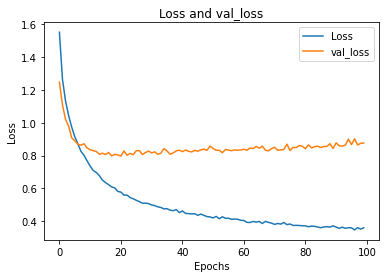

In [ ]:
#Plot loss and val_loss
plt.plot(cif.history['loss'],label='Loss')
plt.plot(cif.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss and val_loss')
plt.legend()

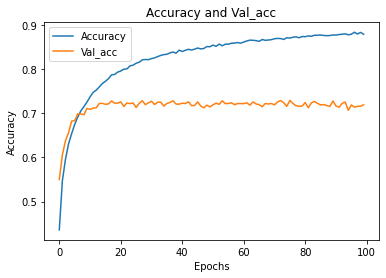

In [ ]:
#Plot accuracy and val_accuracy
plt.plot(cif.history['accuracy'],label='Accuracy')
plt.plot(cif.history['val_accuracy'],label='Val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy and Val_acc')
plt.legend()

In [ ]:
#Evaluate
model.evaluate(x_test,ytest)

313/313 [==============================] - 1s 4ms/step - loss: 0.8762 - accuracy: 0.7197


[0.8761866092681885, 0.7196999788284302]

In [ ]:
#Labels
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()